In [76]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


In [77]:
# core logic
class RosenblattPerceptron:

    def __init__(self, theta, learning_rate, data, data_size, interval, eras = 0):
        self.theta = theta
        self.learning_rate = learning_rate
        self.weights = []
        self.adjustments_count = 0
        self.data = data
        self.data_size = data_size
        self.interval = interval
        self.eras = eras
        self.adjusted_in_this_era = False
        self.eras_adjusting = 0

    def reset_counters(self):
        self.adjustments_count = 0
        self.eras_adjusting = 0


    def activation_degree(self, u):
        if self.theta == 1 and u >= self.theta:
            return 1
        elif self.theta == 0 and u <= self.theta:
            return 1
        else:
            return 0

    def generate_initial_weights(self):
        #plus one for the bias
        weights = []
        for j in range(self.data_size):
           weights.append(rd.uniform(self.interval[0], self.interval[1]))
        self.weights = np.array(weights)
        print("Generated initial weights!")
        print(self.weights)

    def add_bias_to_data(self):
        self.data = np.c_[np.ones(len(self.data)) * -1 ,self.data]


    def start_training(self):
        print("starting training...")
        self.add_bias_to_data()
        self.generate_initial_weights()
        self.run_one_era()
        while self.adjusted_in_this_era:
            self.run_one_era()
        print("training ended")

    def run_one_era(self):
        self.adjusted_in_this_era = False
        for sample in self.data:
            #calc of summation
            sample_data = sample[:self.data_size]
            u = np.dot(self.weights, sample_data)
            y = self.activation_degree(u)
            y_ground_truth = sample[self.data_size]
            learning_and_error = self.learning_rate * (y - y_ground_truth)
            if learning_and_error > 0:
                delta = np.multiply(sample_data, learning_and_error)
                self.weights = np.add(self.weights, delta)
                self.adjusted_in_this_era = True
                self.adjustments_count += 1
                print("weight changed !")
                print(self.weights)
        self.eras_adjusting +=1
        print("Era of count {}. Adjustments made so far {}".format(self.eras_adjusting, self.adjustments_count))

def import_numpy_data(path, size):
    raw_data = np.fromfile(file=path, dtype=float)
    formatted_data = np.array(np.split(raw_data, len(raw_data)/size))
    return formatted_data

def plot_scatter(title, xlabel, ylabel, plot_data, straight_line_p1 = 0, straight_line_p2 = 0, plot_line = False):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for k in plot_data:
        if k[2] == 0:
            plt.scatter(k[0], k[1], c='r')
        else:
            plt.scatter(k[0], k[1], c='b')
    if plot_line:
        x = plot_data[:,0]
        y = straight_line_p1 + straight_line_p2 * x
        plt.scatter(x, y, color="black")
    plt.show()

def obtain_line_by_weight(weights):
    point1 = weights[0] / weights[2]
    point2 = - weights[1] / weights[2]
    return point1, point2

<h1>2.1 Parte I - Resolvendo um problema Linearmente Separável</h1>
<h3>Lendo os dados do arquivo e plotando com as respectivas cores de classe<h3>

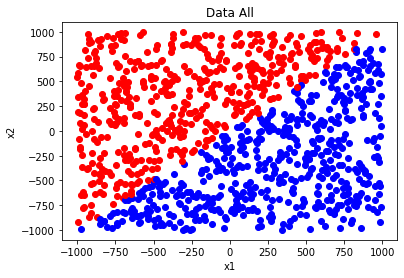

In [78]:
filename = "dataAll.txt"
init_data = import_numpy_data(filename, 3)
plot_scatter("Data All", "x1", "x2", plot_data = init_data)

<h3>Efetuando o treinamento com theta 0, learning rate 0.1 e intervalo para os pesos de (-0.5, 0.5)</h3>

In [79]:
perceptron = RosenblattPerceptron(theta=0, learning_rate=0.1, data=init_data, data_size=3, interval=[-0.5, 0.5])
perceptron.start_training()

starting training...
Generated initial weights!
[ 0.45183754 -0.29276227  0.01055734]
weight changed !
[ 0.35183754 53.36628773 76.50630734]
weight changed !
[ 0.25183754  4.17942773 59.87757734]
weight changed !
[  0.15183754 -45.95001227  56.53921734]
weight changed !
[ 5.18375438e-02 -1.10981902e+02  2.50315734e+00]
weight changed !
[-4.81624562e-02 -7.09729923e+01  8.03958473e+01]
weight changed !
[  -0.14816246 -124.64280227   31.30357734]
weight changed !
[ -0.24816246 -98.03125227 111.19319734]
weight changed !
[  -0.34816246 -147.49207227   62.29914734]
weight changed !
[  -0.44816246 -135.59496227   90.19868734]
weight changed !
[  -0.54816246 -107.38750227  123.78280734]
weight changed !
[  -0.64816246 -177.58124227   56.55712734]
weight changed !
[  -0.74816246 -154.81422227   97.99091734]
weight changed !
[ -0.84816246 -91.76685227 163.68611734]
weight changed !
[  -0.94816246 -163.58629227  112.23073734]
weight changed !
[  -1.04816246 -124.32038227  160.91023734]
weight c

<h3>Plotando o resultado, gerando a reta equação dos pesos obtidos</h3>

Quantidade de épocas do treinamento: 9, Quantidade de ajustes feitos nos pesos: 139


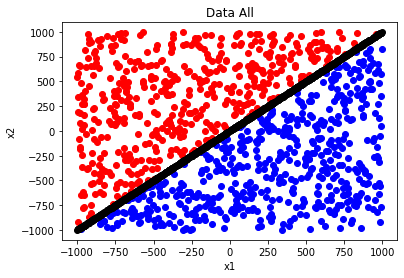

In [80]:
p1, p2 = obtain_line_by_weight(perceptron.weights)
print("Quantidade de épocas do treinamento: {}, Quantidade de ajustes feitos nos pesos: {}".format(perceptron.eras_adjusting, perceptron.adjustments_count))
plot_scatter(title="Data All", xlabel="x1", ylabel="x2", plot_data=init_data, straight_line_p1 = p1, straight_line_p2 = p2, plot_line=True)

<h1>2.2 - Experimentação </h1>

<h3> Primeiro serão plotados os exemplos desta questão </h3>

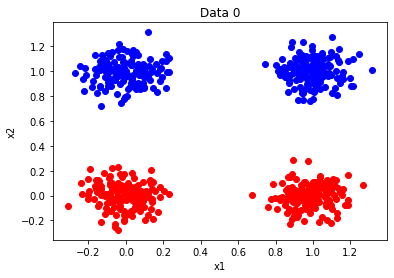

In [81]:
filename = "data0.txt"
data22 = import_numpy_data(filename, 3)
plot_scatter("Data 0", "x1", "x2", plot_data = data22)


starting training...
Generated initial weights!
[-14.15781557  22.00240023 -26.88185113]
Era of count 1. Adjustments made so far 0
training ended
starting training...
Generated initial weights!
[-13.12345572  29.84595857 -12.68451429]
Era of count 1. Adjustments made so far 0
training ended
starting training...
Generated initial weights!
[ 82.29224909 -57.52939764 -82.63724298]
weight changed !
[ 81.89224909 -57.52999511 -82.65157011]
weight changed !
[ 81.49224909 -57.52505533 -82.61057202]
weight changed !
[ 81.09224909 -57.46923694 -82.58814368]
weight changed !
[ 80.69224909 -57.50222313 -82.52521401]
weight changed !
[ 80.29224909 -57.51390456 -82.55847104]
weight changed !
[ 79.89224909 -57.54897584 -82.5743178 ]
weight changed !
[ 79.49224909 -57.58277703 -82.53547252]
weight changed !
[ 79.09224909 -57.58649884 -82.52722115]
weight changed !
[ 78.69224909 -57.66654619 -82.52418915]
weight changed !
[ 78.29224909 -57.6813652  -82.53848156]
weight changed !
[ 77.89224909 -57.6518

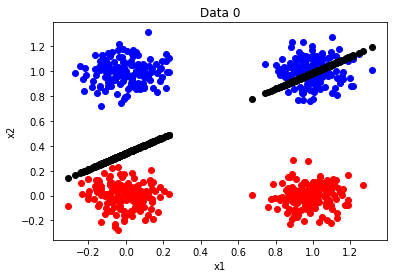

In [82]:
learn_rates_to_try = [0.4, 0.1, 0.01]
initial_weights_to_try = [[-100,100], [-0.5 + 0.5]]
min_eras_to_converge = [0]*6
adjustments_means = []
index = 0
adjustments_qtd = []

learn_rate = learn_rates_to_try[0]
initial_weight_interval = initial_weights_to_try[0]

for i in range(10):
    perceptron.reset_counters()
    perceptron.learning_rate = learn_rate
    perceptron.data = data22
    perceptron.interval = initial_weight_interval
    perceptron.start_training()
    adjustments_qtd.append(perceptron.adjustments_count)
    if min_eras_to_converge[index] > perceptron.eras_adjusting:
        min_eras_to_converge[index] = perceptron.eras_adjusting

    if i >= 9:
        p1, p2 = obtain_line_by_weight(perceptron.weights)
        print("Combination of learning rate {} with initial weight interval {}".format(learn_rate, initial_weight_interval))
        plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = p1, straight_line_p2 = p2, plot_data=data22, plot_line=True)


In [83]:
rna_table = PrettyTable()
rna_table.title = "Configurações"
rna_table.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Quantidade de Ajustes", "Menor número de épocas para convergência"]

In [84]:
rna_table.add_row(["n={}".format(learn_rate),
                           "({},+{})".format(initial_weight_interval[0],initial_weight_interval[1]),
                           "{}+-{}".format(str(np.mean(adjustments_qtd.append)), str(np.std(adjustments_qtd.append))),
                           "{}".format(min_eras_to_converge[index])
                           ])

TypeError: unsupported operand type(s) for /: 'builtin_function_or_method' and 'int'